# 实验十：SVD与协同过滤推荐系统

In [727]:
from numpy import linalg as la
from numpy import *
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [728]:
def loadExData():
    return[[2, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0],
            [3, 3, 4, 0, 3, 0, 0, 2, 2, 0, 0],
            [5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
            [4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5],
            [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4],
            [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
            [0, 0, 0, 3, 0, 0, 0, 0, 4, 5, 0],
            [1, 1, 2, 1, 1, 2, 1, 0, 4, 5, 0]]

In [729]:
# myMat = mat(loadExData()) # np.mat将数值转为matrix，相比于通用的np.array数据结构，可以进行更快的矩阵运算（我感觉没有区别）
myMat = asarray(Image.open('test.jpg'))
myMat = mat(sum(myMat, axis=2))

## 1. SVD图像压缩

In [730]:
# 数据是一个方阵，SVD可以将任意 m x n 的矩阵分解成三个矩阵的乘积
# 同学们可以自己输入非方阵数据，观察结果
print(f'原始矩阵的大小: {myMat.shape}')
print(f'原始矩阵的秩: {la.matrix_rank(myMat)}')

原始矩阵的大小: (186, 205)
原始矩阵的秩: 186


In [731]:
# np.linalg.svd
# 感兴趣的同学可以自己实现一个SVD函数
U, Sigma, VT = linalg.svd(myMat)

In [732]:
print(U.shape) # m x m 的正交矩阵
print(f'U矩阵的秩: {la.matrix_rank(U)}') #行满秩
print(VT.shape) # n x n 的正交矩阵
print(f'V矩阵的秩: {la.matrix_rank(VT)}') #列满秩

(186, 186)
U矩阵的秩: 186
(205, 205)
V矩阵的秩: 205


In [733]:
Sigma  # np.linalg.svd返回会自动对奇异值排序，U、V的特征向量也依此排序

array([7.97227105e+04, 1.59526848e+04, 1.07667862e+04, 9.02151583e+03,
       7.48231102e+03, 7.20881848e+03, 6.20833731e+03, 5.60301728e+03,
       4.98046382e+03, 4.27206201e+03, 3.85444989e+03, 3.69081806e+03,
       3.48274751e+03, 2.82432942e+03, 2.75407945e+03, 2.45659069e+03,
       2.36413664e+03, 2.03747739e+03, 2.01722009e+03, 1.97613894e+03,
       1.88684925e+03, 1.76035396e+03, 1.73675239e+03, 1.71734998e+03,
       1.60819835e+03, 1.49763878e+03, 1.49098242e+03, 1.38305018e+03,
       1.36376901e+03, 1.32126281e+03, 1.26820615e+03, 1.23725371e+03,
       1.17484544e+03, 1.10231706e+03, 1.06493277e+03, 1.03750053e+03,
       1.02633869e+03, 9.64942612e+02, 9.24452471e+02, 9.05111288e+02,
       8.53291399e+02, 8.40554504e+02, 8.20296323e+02, 7.82304104e+02,
       7.66345991e+02, 7.40200991e+02, 7.13768434e+02, 6.74381983e+02,
       6.60724380e+02, 6.56259565e+02, 6.35988621e+02, 5.97506026e+02,
       5.88101019e+02, 5.76381175e+02, 5.55955670e+02, 5.27501339e+02,
      

In [734]:
# Sigma中最后两个奇异值偏小，尝试去除后重构一个新的矩阵
dropnum = 150
new_Sigma = Sigma[:len(Sigma)-dropnum]
new_Sigma_matrix = diag(new_Sigma)
new_myMat = dot(dot(U[:,:len(Sigma)-dropnum], new_Sigma_matrix), VT[:len(Sigma)-dropnum,:])

In [735]:
# 重构后的新矩阵的大小不变，但是总能量减少
print(f'新矩阵的大小: {new_myMat.shape}')
print(f'新矩阵的秩: {la.matrix_rank(new_myMat)}')

新矩阵的大小: (186, 205)
新矩阵的秩: 36


旧矩阵和新矩阵在剔除最后两个奇异值下的热图视觉观感相似

请同学们修改dropnum，查看不同值对结果的影响

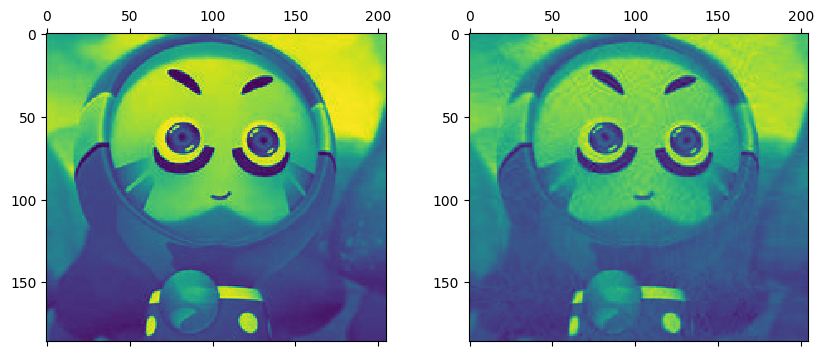

In [736]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.matshow(myMat)
ax2.matshow(new_myMat)

## 2. 完成三个相似性度量方法

#### 欧式距离

In [737]:
def ecludSim(inA, inB):
    inA = array(inA).T[0]
    inB = array(inB).T[0]
    dif = inA - inB
    return 1.0 / (1.0 + linalg.norm(dif))
    pass

#### 余弦相似度

In [738]:
def cosSim(inA, inB):
    inA = array(inA).T[0]
    inB = array(inB).T[0]
    return 0.5 + 0.5 * float(dot(inA, inB.T)) / (linalg.norm(inA) * linalg.norm(inB))
    pass

#### 皮尔逊相关系数

In [739]:
def pearsSim(inA, inB):
    inA = array(inA).T[0]
    inB = array(inB).T[0]
    if len(inA) < 3:
        return 1.0
    pears = corrcoef(inA, inB, rowvar=0)[0][1]
    if isnan(pears):
        pears = 0.0
    return 0.5 + 0.5 * pears
    pass

## 3. 完成对data.csv数据一个用户的商品推荐

In [740]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user, j]
        if userRating == 0:
            continue
        overLap = nonzero(logical_and(dataMat[:, item].A > 0, dataMat[:, j].A > 0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(dataMat[overLap, item], dataMat[overLap, j])
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0:
        return 0
    else:
        if ratSimTotal/simTotal == nan:
            print('ratSim:',ratSimTotal)
            print('sim:',simTotal)
        return ratSimTotal/simTotal

In [741]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0
    ratSimTotal = 0.0
    U, Sigma, VT = la.svd(dataMat)
    Sig4 = mat(eye(top) * Sigma[: top])  # top具体是多少将在后面分析（非规范代码写法）
    xformedItems = dataMat.T * U[:, :top] * Sig4.I  # dataMat.T * U[:, :top] * Sig4.I == VT[:top,:].T
    for j in range(n):
        userRating = dataMat[user, j]
        if userRating == 0 or j == item:
            continue
        similarity = simMeas(xformedItems[item, :].T, xformedItems[j, :].T)
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0:
        return 0
    else:
        return ratSimTotal/simTotal

In [742]:
def recommend(dataMat, user, N=10, simMeas=ecludSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user, :].A == 0)[1]
    if len(unratedItems) == 0:
        return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[: N]

In [743]:
myMat = genfromtxt('data.csv', delimiter=' ', skip_header=1)
myMat = mat(myMat)

In [760]:
# 方式1: 通过欧式距离计算相似度
recommend(myMat, 0, simMeas=ecludSim)

[(308, 4.0),
 (366, 4.0),
 (409, 4.0),
 (408, 3.6666666666666665),
 (340, 3.5294117647058827),
 (439, 3.5294117647058827),
 (50, 3.5),
 (285, 3.5),
 (312, 3.5),
 (427, 3.5)]

In [759]:
# 方式2: 通过余弦相似度计算相似度
recommend(myMat, 0, simMeas=cosSim)

[(308, 4.0),
 (366, 4.0),
 (409, 4.0),
 (408, 3.6666666666666665),
 (360, 3.5080617098070004),
 (88, 3.5),
 (124, 3.5),
 (179, 3.5),
 (201, 3.5),
 (249, 3.5)]

In [758]:
# 方式3: 通过皮尔逊相关系数计算相似度
recommend(myMat, 0, simMeas=pearsSim)

[(308, 4.0),
 (366, 4.0),
 (409, 4.0),
 (360, 3.6666666666666665),
 (408, 3.6666666666666665),
 (88, 3.5),
 (124, 3.5),
 (179, 3.5),
 (201, 3.5),
 (249, 3.5)]

SVD能量分析

In [747]:
U, Sigma, VT = la.svd(myMat)
print(Sigma)                 # 计算矩阵的SVD来了解其需要多少维的特征

[1.56409644e+02 6.28092876e+01 5.99501832e+01 4.96925947e+01
 4.49000295e+01 4.26613607e+01 4.10510660e+01 4.01071126e+01
 3.88761429e+01 3.64591529e+01 3.57051777e+01 3.49517320e+01
 3.26853737e+01 3.23447003e+01 3.11525660e+01 3.07679610e+01
 3.01138797e+01 2.97559125e+01 2.85377453e+01 2.80266733e+01
 2.75822482e+01 2.72901320e+01 2.67666843e+01 2.64727193e+01
 2.61558898e+01 2.55884297e+01 2.54544956e+01 2.49110401e+01
 2.43662441e+01 2.41617689e+01 2.41044205e+01 2.33572975e+01
 2.30542944e+01 2.26576450e+01 2.24682949e+01 2.18281502e+01
 2.16820812e+01 2.13625197e+01 2.12921541e+01 2.09417360e+01
 2.05748005e+01 2.04311551e+01 2.00100146e+01 1.98249493e+01
 1.93976029e+01 1.91270274e+01 1.89812979e+01 1.87137231e+01
 1.85438824e+01 1.84487898e+01 1.80664203e+01 1.78358886e+01
 1.77375568e+01 1.75465237e+01 1.71002334e+01 1.68740001e+01
 1.67761849e+01 1.67115014e+01 1.64411603e+01 1.62535181e+01
 1.56985671e+01 1.56397606e+01 1.55037472e+01 1.51974706e+01
 1.51297041e+01 1.492432

In [748]:
Sig = Sigma**2
print(f'总能量: {sum(Sig):.2f}')   # 计算总能量

总能量: 81183.00


In [749]:
threshold = sum(Sig) * 0.9
print(f'总能量的90%: {threshold:.2f}')  # 计算总能量的90%

总能量的90%: 73064.70


In [750]:
# 计算需要多少个奇异值能达到总能量的90%
for i in range(1,len(Sigma)):
    if(sum(Sig[:i]) < threshold):   # 计算前n个元素所包含的能量
        print(f'前{i}个元素所包含的能量：{sum(Sig[:i]):.2f}, 没有到达90%')
    else:
        print(f'前{i}个元素所包含的能量：{sum(Sig[:i]):.2f}, 达到90%')
        break

前1个元素所包含的能量：24463.98, 没有到达90%
前2个元素所包含的能量：28408.98, 没有到达90%
前3个元素所包含的能量：32003.01, 没有到达90%
前4个元素所包含的能量：34472.36, 没有到达90%
前5个元素所包含的能量：36488.37, 没有到达90%
前6个元素所包含的能量：38308.37, 没有到达90%
前7个元素所包含的能量：39993.56, 没有到达90%
前8个元素所包含的能量：41602.14, 没有到达90%
前9个元素所包含的能量：43113.49, 没有到达90%
前10个元素所包含的能量：44442.76, 没有到达90%
前11个元素所包含的能量：45717.62, 没有到达90%
前12个元素所包含的能量：46939.24, 没有到达90%
前13个元素所包含的能量：48007.58, 没有到达90%
前14个元素所包含的能量：49053.76, 没有到达90%
前15个元素所包含的能量：50024.24, 没有到达90%
前16个元素所包含的能量：50970.91, 没有到达90%
前17个元素所包含的能量：51877.75, 没有到达90%
前18个元素所包含的能量：52763.17, 没有到达90%
前19个元素所包含的能量：53577.57, 没有到达90%
前20个元素所包含的能量：54363.06, 没有到达90%
前21个元素所包含的能量：55123.85, 没有到达90%
前22个元素所包含的能量：55868.60, 没有到达90%
前23个元素所包含的能量：56585.05, 没有到达90%
前24个元素所包含的能量：57285.86, 没有到达90%
前25个元素所包含的能量：57969.99, 没有到达90%
前26个元素所包含的能量：58624.75, 没有到达90%
前27个元素所包含的能量：59272.69, 没有到达90%
前28个元素所包含的能量：59893.25, 没有到达90%
前29个元素所包含的能量：60486.96, 没有到达90%
前30个元素所包含的能量：61070.75, 没有到达90%
前31个元素所包含的能量：61651.77, 没有到达90%
前32个元素所包含的能量：62197.34, 没有到达90%
前33个元素所包含的能量：6272

In [751]:
# 方式4: 通过SVD对原始矩阵降维，再用欧式距离计算相似度
top = 5
recommend(myMat, 0, simMeas=ecludSim, estMethod=svdEst)

[(252, 3.154242486315067),
 (146, 3.15266088847625),
 (13, 3.15115723827369),
 (338, 3.151030542607637),
 (92, 3.150042981572981),
 (101, 3.1493129769801604),
 (336, 3.1493129769801604),
 (333, 3.147972991394313),
 (370, 3.1472540093108776),
 (302, 3.145814790762338)]